In [1]:
import pandas as pd
import numpy as np

# This code displays all results created within a jupyter notebook cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_column', 100)
pd.set_option('display.max_row', 200)

In [63]:
import matplotlib.pyplot as plt
import matplotlib as matplot
%matplotlib inline

In [64]:
#data = pd.read_csv('../Data/Data_by_year_cleaned.csv', header=0)
data = pd.read_csv('../Data/blockgroups/blockgroup_data.csv', header=0)

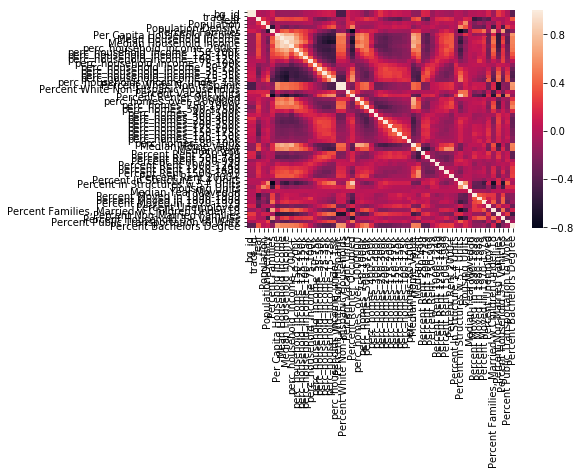

In [65]:
import seaborn as sbn
corr = data.corr()
corr = (corr)
sbn.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

In [3]:
data.head(20)
#bg_data.tail(20)

,Name,bg_id,tract_id,neighborhood,Year,Population,Population Density,Percent Families,Per Capita Household Income,Mean Household Income,Median Household Income,Ratio Mean over Median Income,perc_household_income_200k+,perc_household_income_150-200k,perc_household_income_125-150k,perc_household_income_100-125k,perc_household_income_75-100k,perc_household_income_50-75k,perc_household_income_35-50k,perc_household_income_25-35k,perc_household_income_15-25k,perc_households_income_under_15k,Percent White Non-Hispanic,Percent White Non-Hispanic Households,Percent Vacant Units,Percent Renter Occupied,perc_homes_over_1000000,perc_homes_750-1000k,perc_homes_500-$750k,perc_homes_400-500k,perc_homes_300-400k,perc_homes_250-300k,perc_homes_200-250k,perc_homes_175-200k,perc_homes_150-175k,perc_homes_125-150k,perc_homes_100-125k,perc_homes_80-100k,Median Home Value,Median Rent,Percent Rent 250-499,Percent Rent 500-749,Percent Rent 750-999,Percent Rent 1000-1249,Percent Rent 1250-1499,Percent Rent 1500-1999,Percent Rent 2000+,Percent In Structure 3-4 Units,Percent in Structures w 5+ Units,Housing Units,Median Year Moved In,Percent Moved in 1990-1999,Percent Moved in 1980-1989,Percent Moved in 1970-1979,Percent Unemployed,"Percent Families, Married w Children Under 18",Percent Non-Married Families,Percent Household 3+ Vehicles,Percent Public Transportation to Work,Percent Bachelors Degree
0,BG0001001,530330001001,5303300010,Cedar Park,2017,1401,4056.4,80.3712,66294,156360.0,147165.0,1.062480889,27.1044,21.0438,16.3300,5.3872,6.0606,10.6061,6.7340,2.6936,2.1886,1.8519,73.5903,80.4714,5.8637,17.1717,11.9919,13.6179,27.2358,28.2520,4.6748,10.3659,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,526119.0,1645.0,0.0000,0.0000,0.0000,41.1765,0.0000,30.3922,28.4314,0.0000,0.0000,631,2002,11.4478,18.8552,4.0404,3.7453,27.7778,15.4040,8.7543,11.9326,70.9174
1,BG0001002,530330001002,5303300010,Cedar Park,2017,1393,12510.2,66.4034,22098,45203.0,30000.0,1.506766667,0.1493,2.6866,4.4776,6.1194,6.7164,11.7910,11.6418,12.8358,20.7463,22.8358,39.4831,49.2537,8.9674,84.6269,3.8835,0.0000,0.0000,0.0000,47.5728,24.2718,24.2718,0.0000,0.0000,0.0000,0.0000,0.0,304000.0,819.0,0.0000,11.8166,61.3757,5.4674,0.0000,0.0000,0.0000,7.4728,60.4620,736,2003,2.2388,0.4478,1.4925,3.7879,26.6458,42.0063,8.9552,31.7585,38.4134
2,BG0001003,530330001003,5303300010,Cedar Park,2017,1510,10548.9,59.1391,49403,94961.0,63849.0,1.487274664,11.8622,7.6531,1.1480,8.8010,12.6276,17.7296,13.6480,6.3776,6.5051,13.6480,52.9801,59.9490,6.2201,68.7500,0.0000,0.0000,4.0816,57.5510,17.5510,9.3878,11.4286,0.0000,0.0000,0.0000,0.0000,0.0,420423.0,781.0,2.4119,24.4898,34.6939,4.0816,3.1540,12.2449,0.0000,17.4641,42.5837,836,2003,2.5510,4.5918,0.0000,3.7457,26.4026,31.0231,8.9286,16.9811,42.0175
3,BG0001004,530330001004,5303300010,Cedar Park,2017,1687,34561.9,60.6402,20992,40565.0,33312.0,1.217729347,0.1145,1.4891,0.3436,2.5200,8.3620,16.0367,18.2131,17.5258,17.4112,17.9840,30.3497,40.7789,7.2264,94.2726,100.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,1000000.0,670.0,2.6731,45.3220,27.9465,4.2527,0.0000,2.4301,0.0000,3.2944,74.8141,941,2002,0.0000,0.0000,0.0000,3.8335,25.3049,54.2683,8.8201,26.3098,20.8371
4,BG0001005,530330001005,5303300010,Cedar Park,2017,1063,11943.7,39.3227,40194,65394.0,54200.0,1.206531365,2.6398,4.5031,5.1242,9.9379,11.6460,19.4099,12.2671,10.0932,11.1801,13.1988,50.6115,57.7640,9.8039,90.8385,0.0000,0.0000,0.0000,0.0000,62.7119,37.2881,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,321053.0,957.0,0.0000,7.6923,48.0342,16.5812,16.2393,8.8889,0.0000,0.0000,77.4510,714,2002,1.7081,0.0000,0.0000,3.8864,16.5605,30.5732,8.5404,28.6159,37.1465
5,BG0002001,530330002001,5303300020,Olympic Hills,2017,1219,7663.3,76.3741,36312,90636.0,89113.0,1.01709066,7.6446,7.4380,12.1901,17.1488,12.8099,11.3636,3.9256,4.9587,7.0248,15.4959,56.1936,66.7355,5.0980,29.1322,0.0000,0.0000,6.4140,16.3265,55.9767,16.0350,0.0000,0.0000,5.2478,0.0000,0.0000,0.0,351295.0,891.0,0.0000,14.8936

#### Get census tract Ids

In [4]:
def compute_tract_id(row):
    tid = row['Id']
    tract_id = np.int(tid/100)
    return tract_id 

#data['tract_id'] = data.apply(compute_tract_id, axis = 1)

#### Missing values treatment

In [5]:
def add_col_for_imputing_missing_values_in_median_houseprice(row):    
    y = row['Year']
    tract = row['tract_id']
    if row['Median Home Value'] == 0:
        imputed_value = compute_missing_value_in_median_houseprice(y,tract)
        return imputed_value
    else:
        return row['Median Home Value']
    
def compute_missing_value_in_median_houseprice(y,tract):
    median_houseprice_array =np.array(data.loc[(data['Year'] == y) & (data['tract_id'] == tract),
                                               'Median Home Value'].astype(int))
    mean_median_houseprice = np.mean(median_houseprice_array)
    return mean_median_houseprice 

data['median_houseprice_with_imputation'] = data.apply(add_col_for_imputing_missing_values_in_median_houseprice,
                                                       axis = 1)

In [6]:
def add_col_for_imputing_missing_values_in_median_rent(row):    
    y = row['Year']
    tract = row['tract_id']
    if row['Median Rent'] == 0:
        imputed_value = compute_missing_value_in_median_rent(y,tract)
        return imputed_value
    else:
        return row['Median Rent']


def compute_missing_value_in_median_rent(y,tract):
    median_rent_array =np.array(data.loc[(data['Year'] == y) & (data['tract_id'] == tract),
                                         'Median Rent'].astype(int))
    mean_median_rent = np.mean(median_rent_array)
    return mean_median_rent 

data['median_rent_with_imputation'] = data.apply(add_col_for_imputing_missing_values_in_median_rent,
                                                 axis = 1)

Created a set of general functions to impute values for any columns

def impute_missing_values(df, col='Median Rent'):
    imputed_values = []
    y = df['Year']
    tract = df['tract_id']
    for i, j, k in zip(df[col], y, tract):
        if i == 0:
            imputed_value = compute_missing_value(df, j, k, col)
            imputed_values.append(imputed_value)
        else:
            imputed_values.append(i)
    return imputed_values


def compute_missing_value(df, y, tract, col):
    median_array = np.array(df.loc[(df['Year'] == y) & (df['tract_id'] == tract),
                                    col].astype(int))
    mean_median = np.mean(median_array)
    return mean_median 

bg_data["Median Rent"] = impute_missing_values(df=bg_data,
                                               col="Median Rent")
bg_data["Median Home Value"] = impute_missing_values(df=bg_data,
                                                     col="Median Home Value")
bg_data["Median Household Income"] = impute_missing_values(df=bg_data,
                                                     col="Median Household Income")
bg_data["Mean Household Income"] = impute_missing_values(df=bg_data,
                                                         col="Mean Household Income")
bg_data["Percent Unemployed"] = impute_missing_values(df=bg_data,
                                                         col="Percent Unemployed")


# This double checks to see if there are any null or 0 values in a column
cols = [ #'median_houseprice_with_imputation',
#         'median_rent_with_imputation',
#         "median_home_value_imputed", "median_rent_imputed",
        "Median Rent", "Median Home Value", "Percent Unemployed",
        "Mean Household Income", "Median Household Income"]
dfs = [#data,
       bg_data]

for df in dfs:
    for col in cols:
        try:
            row_cnt = 0
            tot_cnt = 0

            for row in df[col].isnull():
                if row == True:
                    tot_cnt += 1
                    print(row_cnt, row)
                row_cnt += 1

            print("%s has %i nulls" %(col, tot_cnt))
            row_cnt = 0
            tot_cnt = 0

            for row in df[col]:
                if row == 0:
                    tot_cnt += 1
                    print(row_cnt, row)
                row_cnt += 1

            print("%s has %i values = 0" %(col, tot_cnt))
            
        except:
            continue

In [7]:
#bg_data.to_csv('../Data/blockgroups/blockgroup_data.csv',
 #              encoding='utf-8', index=False)

### Definition 1: Sociology 
#### Eligible for Gentrification:
* The block group’s median household income was in the bottom 40th percentile when compared to all block groups in Seattle at the beginning of the time span.
* The block group’s median house value was in the bottom 40th percentile when compared to all block groups in Seattle at the beginning of the time span.

#### Have gentrified:
* An increase in a block group’s educational attainment, as measured by the percentage of residents age 25 and over holding bachelor’s degrees, was in the top third percentile of all block groups in Seattle.
* An increase in a block group’s median house value, as measured by inflation-adjusted median house value, was in the top third percentile of all block groups in Seattle.


#### Calculations for Part1: Eligible for gentrification

In [8]:
def add_col_for_median_income_by_year(row):    
    y = row['Year']
    median_income_for_row = compute_median_income_by_year(y)
    return median_income_for_row

def compute_median_income_by_year(y):
    median_income_of_one_year =np.array(data.loc[data['Year'] == y, 'Median Household Income']. astype(int))
    median_income = np.percentile(median_income_of_one_year, 50)
    return median_income

data['median_income_by_year'] = data.apply(add_col_for_median_income_by_year, axis = 1)

In [9]:
def add_col_for_median_housevalue_by_year(row):    
    y = row['Year']
    median_housevalue_for_row = compute_median_housevalue_by_year(y)
    return median_housevalue_for_row

def compute_median_housevalue_by_year(y):
    median_housevalue_of_one_year =np.array(data.loc[data['Year'] == y, 'median_houseprice_with_imputation']. astype(int))
    median_housevalue = np.percentile(median_housevalue_of_one_year, 50)
    return median_housevalue

data['median_housevalue_by_year'] = data.apply(add_col_for_median_housevalue_by_year, axis = 1)

In [10]:
def add_col_for_median_income_40th_perc(row):    
    y = row['Year']
    median_income_40th_perc = compute_median_income_40th_perc(y)
    return median_income_40th_perc

def compute_median_income_40th_perc(y):
    median_income_40th_perc_of_one_year =np.array(data.loc[data['Year'] == y, 'Median Household Income']. astype(int))
    median_income_40th_perc = np.percentile(median_income_40th_perc_of_one_year, 40)
    return median_income_40th_perc

data['median_income_40th_perc_by_year'] = data.apply(add_col_for_median_income_40th_perc, axis = 1)

In [11]:
def add_col_for_median_housevalue_40th_perc(row):    
    y = row['Year']
    median_housevalue_40th_perc = compute_median_housevalue_40th_perc(y)
    return median_housevalue_40th_perc

def compute_median_housevalue_40th_perc(y):
    median_housevalue_40th_perc_of_one_year =np.array(data.loc[data['Year'] == y, 'median_houseprice_with_imputation']. astype(int))
    median_housevalue_40th_perc = np.percentile(median_housevalue_40th_perc_of_one_year, 40)
    return median_housevalue_40th_perc

data['median_housevalue_40th_perc_by_year'] = data.apply(add_col_for_median_housevalue_40th_perc, axis = 1)

In [12]:
data.head()

,Name,bg_id,tract_id,neighborhood,Year,Population,Population Density,Percent Families,Per Capita Household Income,Mean Household Income,Median Household Income,Ratio Mean over Median Income,perc_household_income_200k+,perc_household_income_150-200k,perc_household_income_125-150k,perc_household_income_100-125k,perc_household_income_75-100k,perc_household_income_50-75k,perc_household_income_35-50k,perc_household_income_25-35k,perc_household_income_15-25k,perc_households_income_under_15k,Percent White Non-Hispanic,Percent White Non-Hispanic Households,Percent Vacant Units,Percent Renter Occupied,perc_homes_over_1000000,perc_homes_750-1000k,perc_homes_500-$750k,perc_homes_400-500k,perc_homes_300-400k,perc_homes_250-300k,perc_homes_200-250k,perc_homes_175-200k,perc_homes_150-175k,perc_homes_125-150k,perc_homes_100-125k,perc_homes_80-100k,Median Home Value,Median Rent,Percent Rent 250-499,Percent Rent 500-749,Percent Rent 750-999,Percent Rent 1000-1249,Percent Rent 1250-1499,Percent Rent 1500-1999,Percent Rent 2000+,Percent In Structure 3-4 Units,Percent in Structures w 5+ Units,Housing Units,Median Year Moved In,Percent Moved in 1990-1999,Percent Moved in 1980-1989,Percent Moved in 1970-1979,Percent Unemployed,"Percent Families, Married w Children Under 18",Percent Non-Married Families,Percent Household 3+ Vehicles,Percent Public Transportation to Work,Percent Bachelors Degree,median_houseprice_with_imputation,median_rent_with_imputation,median_income_by_year,median_housevalue_by_year,median_income_40th_perc_by_year,median_housevalue_40th_perc_by_year
0,BG0001001,530330001001,5303300010,Cedar Park,2017,1401,4056.4,80.3712,66294,156360.0,147165.0,1.062480889,27.1044,21.0438,16.3300,5.3872,6.0606,10.6061,6.7340,2.6936,2.1886,1.8519,73.5903,80.4714,5.8637,17.1717,11.9919,13.6179,27.2358,28.252,4.6748,10.3659,0.0000,0.0,0.0,0.0,0.0,0.0,526119.0,1645.0,0.0000,0.0000,0.0000,41.1765,0.0000,30.3922,28.4314,0.0000,0.0000,631,2002,11.4478,18.8552,4.0404,3.7453,27.7778,15.4040,8.7543,11.9326,70.9174,526119.0,1645.0,86735.5,408449.5,77428.6,371085.2
1,BG0001002,530330001002,5303300010,Cedar Park,2017,1393,12510.2,66.4034,22098,45203.0,30000.0,1.506766667,0.1493,2.6866,4.4776,6.1194,6.7164,11.7910,11.6418,12.8358,20.7463,22.8358,39.4831,49.2537,8.9674,84.6269,3.8835,0.0000,0.0000,0.000,47.5728,24.2718,24.2718,0.0,0.0,0.0,0.0,0.0,304000.0,819.0,0.0000,11.8166,61.3757,5.4674,0.0000,0.0000,0.0000,7.4728,60.4620,736,2003,2.2388,0.4478,1.4925,3.7879,26.6458,42.0063,8.9552,31.7585,38.4134,304000.0,819.0,86735.5,408449.5,77428.6,371085.2
2,BG0001003,530330001003,5303300010,Cedar Park,2017,1510,10548.9,59.1391,49403,94961.0,63849.0,1.487274664,11.8622,7.6531,1.1480,8.8010,12.6276,17.7296,13.6480,6.3776,6.5051,13.6480,52.9801,59.9490,6.2201,68.7500,0.0000,0.0000,4.0816,57.551,17.5510,9.3878,11.4286,0.0,0.0,0.0,0.0,0.0,420423.0,781.0,2.4119,24.4898,34.6939,4.0816,3.1540,12.2449,0.0000,17.4641,42.5837,836,2003,2.5510,4.5918,0.0000,3.7457,26.4026,31.0231,8.9286,16.9811,42.0175,420423.0,781.0,86735.5,408449.5,77428.6,371085.2
3,BG0001004,530330001004,5303300010,Cedar Park,2017,1687,34561.9,60.6402,20992,40565.0,33312.0,1.217729347,0.1145,1.4891,0.3436,2.5200,8.3620,16.0367,18.2131,17.5258,17.4112,17.9840,30.3497,40.7789,7.2264,94.2726,100.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1000000.0,670.0,2.6731,45.3220,27.9465,4.2527,0.0000,2.4301,0.0000,3.2944,74.8141,941,2002,0.0000,0.0000,0.0000,3.8335,25.3049,54.2683,8.8201,26.3098,20.8371,1000000.0,670.0,86735.5,408449.5,77428.6,371085.2
4,BG0001005,530330001005,5303300010,Cedar Park,2017,1063,11943.7,39.3227,40194,65394.0,54200.0,1.206531365,2.6398,4.5031,5.1242,9.9379,11.6460,19.4099,12.2671,10.0932,11.1801,13.1988,50.6115,57.7640,9.8039,90.8385,0.0000,0.0000,0.0000,0.000,62.7119,37.2881,0.0000,0.0,0.0,0.0,0.0,0.0,321053.0,957.0,0.0000,7.6923,48.0342,16.5812,16.2393,8.8889,0.0000,0.0000,77.4510,714,2002,1.7081,0.0000,0.0000,3.8864,16.5605,30.5732,8.5404,28.6159,37.1465,321053.0,957.0,8

#### Calculations for Part2: Have gentrified

In [16]:
data['Education_Attainment_Bachelors_Degree'] = round(data['Percent Bachelors Degree']*(data['Population'])*0.01,0)

def add_col_for_increase_in_edu_attainment(row):    
    y = row['Year']
    bg = row['Name']
    increase_in_edu_attainment_for_row = compute_increase_in_edu_attainment(y,bg)
    return increase_in_edu_attainment_for_row

def compute_increase_in_edu_attainment(y,bg):
    if(y==2011  or y==2012 or y==2013 or y==2014 or y==2015 or y==2016 or y==2017):
        edu_attainment_by_year2 =np.array(data.loc[(data['Year'] == y) & (data['Name'] == bg), 'Education_Attainment_Bachelors_Degree']. astype(int))
        edu_attainment_by_year1 =np.array(data.loc[(data['Year'] == y-1) & (data['Name'] == bg), 'Education_Attainment_Bachelors_Degree']. astype(int))
        increase_in_edu_attainment_by_year = edu_attainment_by_year2 - edu_attainment_by_year1
        return increase_in_edu_attainment_by_year 
    elif y==2010:
        edu_attainment_by_year2 =np.array(data.loc[(data['Year'] == y) & (data['Name'] == bg), 'Education_Attainment_Bachelors_Degree']. astype(int))
        edu_attainment_by_year1 =np.array(data.loc[(data['Year'] == 2000) & (data['Name'] == bg), 'Education_Attainment_Bachelors_Degree']. astype(int))
        increase_in_edu_attainment_by_year = edu_attainment_by_year2 - edu_attainment_by_year1
        return increase_in_edu_attainment_by_year 
    else:
        return 0

data['increase_in_edu_attainment'] = data.apply(add_col_for_increase_in_edu_attainment, axis = 1)

In [17]:
data.head()

,Name,bg_id,tract_id,neighborhood,Year,Population,Population Density,Percent Families,Per Capita Household Income,Mean Household Income,Median Household Income,Ratio Mean over Median Income,perc_household_income_200k+,perc_household_income_150-200k,perc_household_income_125-150k,perc_household_income_100-125k,perc_household_income_75-100k,perc_household_income_50-75k,perc_household_income_35-50k,perc_household_income_25-35k,perc_household_income_15-25k,perc_households_income_under_15k,Percent White Non-Hispanic,Percent White Non-Hispanic Households,Percent Vacant Units,Percent Renter Occupied,perc_homes_over_1000000,perc_homes_750-1000k,perc_homes_500-$750k,perc_homes_400-500k,perc_homes_300-400k,perc_homes_250-300k,perc_homes_200-250k,perc_homes_175-200k,perc_homes_150-175k,perc_homes_125-150k,perc_homes_100-125k,perc_homes_80-100k,Median Home Value,Median Rent,Percent Rent 250-499,Percent Rent 500-749,Percent Rent 750-999,Percent Rent 1000-1249,Percent Rent 1250-1499,Percent Rent 1500-1999,Percent Rent 2000+,Percent In Structure 3-4 Units,Percent in Structures w 5+ Units,Housing Units,Median Year Moved In,Percent Moved in 1990-1999,Percent Moved in 1980-1989,Percent Moved in 1970-1979,Percent Unemployed,"Percent Families, Married w Children Under 18",Percent Non-Married Families,Percent Household 3+ Vehicles,Percent Public Transportation to Work,Percent Bachelors Degree,median_houseprice_with_imputation,median_rent_with_imputation,median_income_by_year,median_housevalue_by_year,median_income_40th_perc_by_year,median_housevalue_40th_perc_by_year,Education_Attainment_Bachelors_Degree,increase_in_edu_attainment
0,BG0001001,530330001001,5303300010,Cedar Park,2017,1401,4056.4,80.3712,66294,156360.0,147165.0,1.062480889,27.1044,21.0438,16.3300,5.3872,6.0606,10.6061,6.7340,2.6936,2.1886,1.8519,73.5903,80.4714,5.8637,17.1717,11.9919,13.6179,27.2358,28.252,4.6748,10.3659,0.0000,0.0,0.0,0.0,0.0,0.0,526119.0,1645.0,0.0000,0.0000,0.0000,41.1765,0.0000,30.3922,28.4314,0.0000,0.0000,631,2002,11.4478,18.8552,4.0404,3.7453,27.7778,15.4040,8.7543,11.9326,70.9174,526119.0,1645.0,86735.5,408449.5,77428.6,371085.2,994.0,7
1,BG0001002,530330001002,5303300010,Cedar Park,2017,1393,12510.2,66.4034,22098,45203.0,30000.0,1.506766667,0.1493,2.6866,4.4776,6.1194,6.7164,11.7910,11.6418,12.8358,20.7463,22.8358,39.4831,49.2537,8.9674,84.6269,3.8835,0.0000,0.0000,0.000,47.5728,24.2718,24.2718,0.0,0.0,0.0,0.0,0.0,304000.0,819.0,0.0000,11.8166,61.3757,5.4674,0.0000,0.0000,0.0000,7.4728,60.4620,736,2003,2.2388,0.4478,1.4925,3.7879,26.6458,42.0063,8.9552,31.7585,38.4134,304000.0,819.0,86735.5,408449.5,77428.6,371085.2,535.0,14
2,BG0001003,530330001003,5303300010,Cedar Park,2017,1510,10548.9,59.1391,49403,94961.0,63849.0,1.487274664,11.8622,7.6531,1.1480,8.8010,12.6276,17.7296,13.6480,6.3776,6.5051,13.6480,52.9801,59.9490,6.2201,68.7500,0.0000,0.0000,4.0816,57.551,17.5510,9.3878,11.4286,0.0,0.0,0.0,0.0,0.0,420423.0,781.0,2.4119,24.4898,34.6939,4.0816,3.1540,12.2449,0.0000,17.4641,42.5837,836,2003,2.5510,4.5918,0.0000,3.7457,26.4026,31.0231,8.9286,16.9811,42.0175,420423.0,781.0,86735.5,408449.5,77428.6,371085.2,634.0,15
3,BG0001004,530330001004,5303300010,Cedar Park,2017,1687,34561.9,60.6402,20992,40565.0,33312.0,1.217729347,0.1145,1.4891,0.3436,2.5200,8.3620,16.0367,18.2131,17.5258,17.4112,17.9840,30.3497,40.7789,7.2264,94.2726,100.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1000000.0,670.0,2.6731,45.3220,27.9465,4.2527,0.0000,2.4301,0.0000,3.2944,74.8141,941,2002,0.0000,0.0000,0.0000,3.8335,25.3049,54.2683,8.8201,26.3098,20.8371,1000000.0,670.0,86735.5,408449.5,77428.6,371085.2,352.0,16
4,BG0001005,530330001005,5303300010,Cedar Park,2017,1063,11943.7,39.3227,40194,65394.0,54200.0,1.206531365,2.6398,4.5031,5.1242,9.9379,11.6460,19.4099,12.2671,10.0932,11.1801,13.1988,50.6115,57.7640,9.8039,90.8385,0.0000,0.0000,0.0000,0.000,62.7119,37.2881,0.0000,0.0,0.0,0.0,0.0,0.0,321053.0,957.0,0.0000,7.6923,48.0342,16.5812,16.2393,8.8889,0.0000,0.0000,

In [18]:
def add_col_for_edu_attainment_top_3rd_percentile_by_year(row):    
    y = row['Year']
    edu_attainment_top_3rd_percentile_for_row = compute_edu_attainmenttop_3rd_percentile_by_year(y)
    return edu_attainment_top_3rd_percentile_for_row

def compute_edu_attainmenttop_3rd_percentile_by_year(y):
    increase_edu_attainment_top_3rd_percentile_one_year =np.array(data.loc[data['Year'] == y,
                                                                           'increase_in_edu_attainment']. astype(int))
    increase_edu_attainment_top_3rd_percentile_by_year = np.percentile(increase_edu_attainment_top_3rd_percentile_one_year, 66)
    return increase_edu_attainment_top_3rd_percentile_by_year

data['increase_in_edu_attainment_top_3rd_percentile_by_year'] = data.apply(add_col_for_edu_attainment_top_3rd_percentile_by_year, axis = 1)

In [19]:
data.head()

,Name,bg_id,tract_id,neighborhood,Year,Population,Population Density,Percent Families,Per Capita Household Income,Mean Household Income,Median Household Income,Ratio Mean over Median Income,perc_household_income_200k+,perc_household_income_150-200k,perc_household_income_125-150k,perc_household_income_100-125k,perc_household_income_75-100k,perc_household_income_50-75k,perc_household_income_35-50k,perc_household_income_25-35k,perc_household_income_15-25k,perc_households_income_under_15k,Percent White Non-Hispanic,Percent White Non-Hispanic Households,Percent Vacant Units,Percent Renter Occupied,perc_homes_over_1000000,perc_homes_750-1000k,perc_homes_500-$750k,perc_homes_400-500k,perc_homes_300-400k,perc_homes_250-300k,perc_homes_200-250k,perc_homes_175-200k,perc_homes_150-175k,perc_homes_125-150k,perc_homes_100-125k,perc_homes_80-100k,Median Home Value,Median Rent,Percent Rent 250-499,Percent Rent 500-749,Percent Rent 750-999,Percent Rent 1000-1249,Percent Rent 1250-1499,Percent Rent 1500-1999,Percent Rent 2000+,Percent In Structure 3-4 Units,Percent in Structures w 5+ Units,Housing Units,Median Year Moved In,Percent Moved in 1990-1999,Percent Moved in 1980-1989,Percent Moved in 1970-1979,Percent Unemployed,"Percent Families, Married w Children Under 18",Percent Non-Married Families,Percent Household 3+ Vehicles,Percent Public Transportation to Work,Percent Bachelors Degree,median_houseprice_with_imputation,median_rent_with_imputation,median_income_by_year,median_housevalue_by_year,median_income_40th_perc_by_year,median_housevalue_40th_perc_by_year,Education_Attainment_Bachelors_Degree,increase_in_edu_attainment,increase_in_edu_attainment_top_3rd_percentile_by_year
0,BG0001001,530330001001,5303300010,Cedar Park,2017,1401,4056.4,80.3712,66294,156360.0,147165.0,1.062480889,27.1044,21.0438,16.3300,5.3872,6.0606,10.6061,6.7340,2.6936,2.1886,1.8519,73.5903,80.4714,5.8637,17.1717,11.9919,13.6179,27.2358,28.252,4.6748,10.3659,0.0000,0.0,0.0,0.0,0.0,0.0,526119.0,1645.0,0.0000,0.0000,0.0000,41.1765,0.0000,30.3922,28.4314,0.0000,0.0000,631,2002,11.4478,18.8552,4.0404,3.7453,27.7778,15.4040,8.7543,11.9326,70.9174,526119.0,1645.0,86735.5,408449.5,77428.6,371085.2,994.0,7,20.0
1,BG0001002,530330001002,5303300010,Cedar Park,2017,1393,12510.2,66.4034,22098,45203.0,30000.0,1.506766667,0.1493,2.6866,4.4776,6.1194,6.7164,11.7910,11.6418,12.8358,20.7463,22.8358,39.4831,49.2537,8.9674,84.6269,3.8835,0.0000,0.0000,0.000,47.5728,24.2718,24.2718,0.0,0.0,0.0,0.0,0.0,304000.0,819.0,0.0000,11.8166,61.3757,5.4674,0.0000,0.0000,0.0000,7.4728,60.4620,736,2003,2.2388,0.4478,1.4925,3.7879,26.6458,42.0063,8.9552,31.7585,38.4134,304000.0,819.0,86735.5,408449.5,77428.6,371085.2,535.0,14,20.0
2,BG0001003,530330001003,5303300010,Cedar Park,2017,1510,10548.9,59.1391,49403,94961.0,63849.0,1.487274664,11.8622,7.6531,1.1480,8.8010,12.6276,17.7296,13.6480,6.3776,6.5051,13.6480,52.9801,59.9490,6.2201,68.7500,0.0000,0.0000,4.0816,57.551,17.5510,9.3878,11.4286,0.0,0.0,0.0,0.0,0.0,420423.0,781.0,2.4119,24.4898,34.6939,4.0816,3.1540,12.2449,0.0000,17.4641,42.5837,836,2003,2.5510,4.5918,0.0000,3.7457,26.4026,31.0231,8.9286,16.9811,42.0175,420423.0,781.0,86735.5,408449.5,77428.6,371085.2,634.0,15,20.0
3,BG0001004,530330001004,5303300010,Cedar Park,2017,1687,34561.9,60.6402,20992,40565.0,33312.0,1.217729347,0.1145,1.4891,0.3436,2.5200,8.3620,16.0367,18.2131,17.5258,17.4112,17.9840,30.3497,40.7789,7.2264,94.2726,100.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1000000.0,670.0,2.6731,45.3220,27.9465,4.2527,0.0000,2.4301,0.0000,3.2944,74.8141,941,2002,0.0000,0.0000,0.0000,3.8335,25.3049,54.2683,8.8201,26.3098,20.8371,1000000.0,670.0,86735.5,408449.5,77428.6,371085.2,352.0,16,20.0
4,BG0001005,530330001005,5303300010,Cedar Park,2017,1063,11943.7,39.3227,40194,65394.0,54200.0,1.206531365,2.6398,4.5031,5.1242,9.9379,11.6460,19.4099,12.2671,10.0932,11.1801,13.1988,50.6115,57.7640,9.8039,90.8385,0.0000,0.0000,0.0000,0.000,62.7119,37.2881,0.0000,0.0,0.0,0.0,0.0,0.0,

In [22]:
def add_col_for_increase_in_median_housevalue(row):    
    y = row['Year']
    bg = row['Name']
    increase_in_median_housevalue_by_year = compute_increase_in_median_housevalue(y,bg)
    return increase_in_median_housevalue_by_year

def compute_increase_in_median_housevalue(y,bg):
    if(y==2011  or y==2012 or y==2013 or y==2014 or y==2015 or y==2016 or y==2017):
        median_housevalue_by_year2 =np.array(data.loc[(data['Year'] == y) & (data['Name'] == bg),
                                                         'median_houseprice_with_imputation']. astype(int))
        median_housevalue_by_year1 =np.array(data.loc[(data['Year'] == y-1) & (data['Name'] == bg),
                                                         'median_houseprice_with_imputation']. astype(int))
        increase_in_median_housevalue_by_year = median_housevalue_by_year2 - median_housevalue_by_year1
        return increase_in_median_housevalue_by_year 
    elif(y==2010):
        median_housevalue_by_year2 =np.array(data.loc[(data['Year'] == y) & (data['Name'] == bg),
                                                         'median_houseprice_with_imputation']. astype(int))
        median_housevalue_by_year1 =np.array(data.loc[(data['Year'] == 2000) & (data['Name'] == bg),
                                                         'median_houseprice_with_imputation']. astype(int))
        increase_in_median_housevalue_by_year = median_housevalue_by_year2 - median_housevalue_by_year1
        return increase_in_median_housevalue_by_year     
    else:
        return 0
    
data['increase_in_median_housevalue'] = data.apply(add_col_for_increase_in_median_housevalue, axis = 1)

In [23]:
data.head()

,Name,bg_id,tract_id,neighborhood,Year,Population,Population Density,Percent Families,Per Capita Household Income,Mean Household Income,Median Household Income,Ratio Mean over Median Income,perc_household_income_200k+,perc_household_income_150-200k,perc_household_income_125-150k,perc_household_income_100-125k,perc_household_income_75-100k,perc_household_income_50-75k,perc_household_income_35-50k,perc_household_income_25-35k,perc_household_income_15-25k,perc_households_income_under_15k,Percent White Non-Hispanic,Percent White Non-Hispanic Households,Percent Vacant Units,Percent Renter Occupied,perc_homes_over_1000000,perc_homes_750-1000k,perc_homes_500-$750k,perc_homes_400-500k,perc_homes_300-400k,perc_homes_250-300k,perc_homes_200-250k,perc_homes_175-200k,perc_homes_150-175k,perc_homes_125-150k,perc_homes_100-125k,perc_homes_80-100k,Median Home Value,Median Rent,Percent Rent 250-499,Percent Rent 500-749,Percent Rent 750-999,Percent Rent 1000-1249,Percent Rent 1250-1499,Percent Rent 1500-1999,Percent Rent 2000+,Percent In Structure 3-4 Units,Percent in Structures w 5+ Units,Housing Units,Median Year Moved In,Percent Moved in 1990-1999,Percent Moved in 1980-1989,Percent Moved in 1970-1979,Percent Unemployed,"Percent Families, Married w Children Under 18",Percent Non-Married Families,Percent Household 3+ Vehicles,Percent Public Transportation to Work,Percent Bachelors Degree,median_houseprice_with_imputation,median_rent_with_imputation,median_income_by_year,median_housevalue_by_year,median_income_40th_perc_by_year,median_housevalue_40th_perc_by_year,Education_Attainment_Bachelors_Degree,increase_in_edu_attainment,increase_in_edu_attainment_top_3rd_percentile_by_year,increase_in_median_housevalue
0,BG0001001,530330001001,5303300010,Cedar Park,2017,1401,4056.4,80.3712,66294,156360.0,147165.0,1.062480889,27.1044,21.0438,16.3300,5.3872,6.0606,10.6061,6.7340,2.6936,2.1886,1.8519,73.5903,80.4714,5.8637,17.1717,11.9919,13.6179,27.2358,28.252,4.6748,10.3659,0.0000,0.0,0.0,0.0,0.0,0.0,526119.0,1645.0,0.0000,0.0000,0.0000,41.1765,0.0000,30.3922,28.4314,0.0000,0.0000,631,2002,11.4478,18.8552,4.0404,3.7453,27.7778,15.4040,8.7543,11.9326,70.9174,526119.0,1645.0,86735.5,408449.5,77428.6,371085.2,994.0,7,20.0,16276
1,BG0001002,530330001002,5303300010,Cedar Park,2017,1393,12510.2,66.4034,22098,45203.0,30000.0,1.506766667,0.1493,2.6866,4.4776,6.1194,6.7164,11.7910,11.6418,12.8358,20.7463,22.8358,39.4831,49.2537,8.9674,84.6269,3.8835,0.0000,0.0000,0.000,47.5728,24.2718,24.2718,0.0,0.0,0.0,0.0,0.0,304000.0,819.0,0.0000,11.8166,61.3757,5.4674,0.0000,0.0000,0.0000,7.4728,60.4620,736,2003,2.2388,0.4478,1.4925,3.7879,26.6458,42.0063,8.9552,31.7585,38.4134,304000.0,819.0,86735.5,408449.5,77428.6,371085.2,535.0,14,20.0,-4000
2,BG0001003,530330001003,5303300010,Cedar Park,2017,1510,10548.9,59.1391,49403,94961.0,63849.0,1.487274664,11.8622,7.6531,1.1480,8.8010,12.6276,17.7296,13.6480,6.3776,6.5051,13.6480,52.9801,59.9490,6.2201,68.7500,0.0000,0.0000,4.0816,57.551,17.5510,9.3878,11.4286,0.0,0.0,0.0,0.0,0.0,420423.0,781.0,2.4119,24.4898,34.6939,4.0816,3.1540,12.2449,0.0000,17.4641,42.5837,836,2003,2.5510,4.5918,0.0000,3.7457,26.4026,31.0231,8.9286,16.9811,42.0175,420423.0,781.0,86735.5,408449.5,77428.6,371085.2,634.0,15,20.0,-15
3,BG0001004,530330001004,5303300010,Cedar Park,2017,1687,34561.9,60.6402,20992,40565.0,33312.0,1.217729347,0.1145,1.4891,0.3436,2.5200,8.3620,16.0367,18.2131,17.5258,17.4112,17.9840,30.3497,40.7789,7.2264,94.2726,100.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1000000.0,670.0,2.6731,45.3220,27.9465,4.2527,0.0000,2.4301,0.0000,3.2944,74.8141,941,2002,0.0000,0.0000,0.0000,3.8335,25.3049,54.2683,8.8201,26.3098,20.8371,1000000.0,670.0,86735.5,408449.5,77428.6,371085.2,352.0,16,20.0,0
4,BG0001005,530330001005,5303300010,Cedar Park,2017,1063,11943.7,39.3227,40194,65394.0,54200.0,1.206531365,2.6398,4.5031,5.1242,9.9379,11.6460,19.4099,12.2671,10.0932,11.1801,13.1988,50.6115,57.7640,9.8039,90.8385,0.0000,0.0000,0.0000,0

In [24]:
def add_col_for_housevalue_top_3rd_percentile_by_year(row):    
    y = row['Year']
    housevlue_top_3rd_percentile_for_row = compute_housevalue_top_3rd_percentile_by_year(y)
    return housevlue_top_3rd_percentile_for_row

def compute_housevalue_top_3rd_percentile_by_year(y):
    increase_housevalue_top_3rd_percentile_one_year = np.array(data.loc[data['Year'] == y,
                                                                        'increase_in_median_housevalue']. astype(int))
    increase_housevalue_top_3rd_percentile_by_year = np.percentile(increase_housevalue_top_3rd_percentile_one_year, 66)
    return increase_housevalue_top_3rd_percentile_by_year

data['increase_in_housevalue_top_3rd_percentile_by_year'] = data.apply(add_col_for_housevalue_top_3rd_percentile_by_year, axis = 1)

In [25]:
data.head()

,Name,bg_id,tract_id,neighborhood,Year,Population,Population Density,Percent Families,Per Capita Household Income,Mean Household Income,Median Household Income,Ratio Mean over Median Income,perc_household_income_200k+,perc_household_income_150-200k,perc_household_income_125-150k,perc_household_income_100-125k,perc_household_income_75-100k,perc_household_income_50-75k,perc_household_income_35-50k,perc_household_income_25-35k,perc_household_income_15-25k,perc_households_income_under_15k,Percent White Non-Hispanic,Percent White Non-Hispanic Households,Percent Vacant Units,Percent Renter Occupied,perc_homes_over_1000000,perc_homes_750-1000k,perc_homes_500-$750k,perc_homes_400-500k,perc_homes_300-400k,perc_homes_250-300k,perc_homes_200-250k,perc_homes_175-200k,perc_homes_150-175k,perc_homes_125-150k,perc_homes_100-125k,perc_homes_80-100k,Median Home Value,Median Rent,Percent Rent 250-499,Percent Rent 500-749,Percent Rent 750-999,Percent Rent 1000-1249,Percent Rent 1250-1499,Percent Rent 1500-1999,Percent Rent 2000+,Percent In Structure 3-4 Units,Percent in Structures w 5+ Units,Housing Units,Median Year Moved In,Percent Moved in 1990-1999,Percent Moved in 1980-1989,Percent Moved in 1970-1979,Percent Unemployed,"Percent Families, Married w Children Under 18",Percent Non-Married Families,Percent Household 3+ Vehicles,Percent Public Transportation to Work,Percent Bachelors Degree,median_houseprice_with_imputation,median_rent_with_imputation,median_income_by_year,median_housevalue_by_year,median_income_40th_perc_by_year,median_housevalue_40th_perc_by_year,Education_Attainment_Bachelors_Degree,increase_in_edu_attainment,increase_in_edu_attainment_top_3rd_percentile_by_year,increase_in_median_housevalue,increase_in_housevalue_top_3rd_percentile_by_year
0,BG0001001,530330001001,5303300010,Cedar Park,2017,1401,4056.4,80.3712,66294,156360.0,147165.0,1.062480889,27.1044,21.0438,16.3300,5.3872,6.0606,10.6061,6.7340,2.6936,2.1886,1.8519,73.5903,80.4714,5.8637,17.1717,11.9919,13.6179,27.2358,28.252,4.6748,10.3659,0.0000,0.0,0.0,0.0,0.0,0.0,526119.0,1645.0,0.0000,0.0000,0.0000,41.1765,0.0000,30.3922,28.4314,0.0000,0.0000,631,2002,11.4478,18.8552,4.0404,3.7453,27.7778,15.4040,8.7543,11.9326,70.9174,526119.0,1645.0,86735.5,408449.5,77428.6,371085.2,994.0,7,20.0,16276,4181.28
1,BG0001002,530330001002,5303300010,Cedar Park,2017,1393,12510.2,66.4034,22098,45203.0,30000.0,1.506766667,0.1493,2.6866,4.4776,6.1194,6.7164,11.7910,11.6418,12.8358,20.7463,22.8358,39.4831,49.2537,8.9674,84.6269,3.8835,0.0000,0.0000,0.000,47.5728,24.2718,24.2718,0.0,0.0,0.0,0.0,0.0,304000.0,819.0,0.0000,11.8166,61.3757,5.4674,0.0000,0.0000,0.0000,7.4728,60.4620,736,2003,2.2388,0.4478,1.4925,3.7879,26.6458,42.0063,8.9552,31.7585,38.4134,304000.0,819.0,86735.5,408449.5,77428.6,371085.2,535.0,14,20.0,-4000,4181.28
2,BG0001003,530330001003,5303300010,Cedar Park,2017,1510,10548.9,59.1391,49403,94961.0,63849.0,1.487274664,11.8622,7.6531,1.1480,8.8010,12.6276,17.7296,13.6480,6.3776,6.5051,13.6480,52.9801,59.9490,6.2201,68.7500,0.0000,0.0000,4.0816,57.551,17.5510,9.3878,11.4286,0.0,0.0,0.0,0.0,0.0,420423.0,781.0,2.4119,24.4898,34.6939,4.0816,3.1540,12.2449,0.0000,17.4641,42.5837,836,2003,2.5510,4.5918,0.0000,3.7457,26.4026,31.0231,8.9286,16.9811,42.0175,420423.0,781.0,86735.5,408449.5,77428.6,371085.2,634.0,15,20.0,-15,4181.28
3,BG0001004,530330001004,5303300010,Cedar Park,2017,1687,34561.9,60.6402,20992,40565.0,33312.0,1.217729347,0.1145,1.4891,0.3436,2.5200,8.3620,16.0367,18.2131,17.5258,17.4112,17.9840,30.3497,40.7789,7.2264,94.2726,100.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1000000.0,670.0,2.6731,45.3220,27.9465,4.2527,0.0000,2.4301,0.0000,3.2944,74.8141,941,2002,0.0000,0.0000,0.0000,3.8335,25.3049,54.2683,8.8201,26.3098,20.8371,1000000.0,670.0,86735.5,408449.5,77428.6,371085.2,352.0,16,20.0,0,4181.28
4,BG0001005,530330001005,5303300010,Cedar Park,2017,1063,11943.7,39.3227,40194,65394.0,54200.0,1.206531365,2.6398,4.5031,5.1242,9.9379,11.6460,19.4099,12.

#### Labelling the tracts per definition 1

In [32]:
def label_def1(row):
   if row['Year'] == 2010 or row['Year'] == 2000:
      return 'None'
   if row['Median Household Income'] < row['median_income_40th_perc_by_year'] and row['median_houseprice_with_imputation'] < row['median_housevalue_40th_perc_by_year']:
      return 'EligibleForGentrification'
   if row['increase_in_edu_attainment'] > row['increase_in_edu_attainment_top_3rd_percentile_by_year'] and row['increase_in_median_housevalue'] > row['increase_in_housevalue_top_3rd_percentile_by_year']:
      return 'HaveGentrified'
   else:
      return 'NotEligibleForGentrification'

In [33]:
data['def_1'] = data.apply(label_def1, axis=1)

### Definition 2: Financial & Economics
#### Currently gentrifying:
* The block group’s income levels below 40% of the median, and experienced rent increases greater than the median neighborhood did.

#### Have gentrified:
* The block group’s share of neighborhoods in a metro area that moved from the bottom half to the top half in the distribution of home prices.

#### Calculations for Part1: Currently gentrifying

In [28]:
def add_col_for_40_percent_median_income_by_year(row):    
    y = row['Year']
    median_income_40_percent_for_row = compute_median_income_40_percent_by_year(y)
    return median_income_40_percent_for_row

def compute_median_income_40_percent_by_year(y):
    median_income_40_percent_of_one_year =np.array(data.loc[data['Year'] == y, 'Median Household Income']. astype(int))
    median_income_40_percent_by_year = np.percentile(median_income_40_percent_of_one_year, 50)*0.4
    return median_income_40_percent_by_year

data['median_income_40_percent_by_year'] = data.apply(add_col_for_40_percent_median_income_by_year, axis = 1)

In [37]:
def add_col_for_increase_in_median_rent(row):    
    y = row['Year']
    bg = row['Name']
    increase_in_median_rent = compute_increase_in_median_rent(y,bg)
    return increase_in_median_rent

def compute_increase_in_median_rent(y,bg):
    if y==2000:
        return 0
    elif y==2010:
        median_rent_by_year2 =np.array(data.loc[(data['Year'] == y) & (data['Name'] == bg), 'median_rent_with_imputation']. astype(int))
        median_rent_by_year1 =np.array(data.loc[(data['Year'] == 2000) & (data['Name'] == bg), 'median_rent_with_imputation']. astype(int))
        increase_in_median_rent_by_year = median_rent_by_year2 - median_rent_by_year1
        return increase_in_median_rent_by_year 
    else:
        median_rent_by_year2 =np.array(data.loc[(data['Year'] == y) & (data['Name'] == bg), 'median_rent_with_imputation']. astype(int))
        median_rent_by_year1 =np.array(data.loc[(data['Year'] == y-1) & (data['Name'] == bg), 'median_rent_with_imputation']. astype(int))
        increase_in_median_rent_by_year = median_rent_by_year2 - median_rent_by_year1
        return increase_in_median_rent_by_year 

data['increase_in_median_rent'] = data.apply(add_col_for_increase_in_median_rent, axis = 1)

In [38]:
data.head()

,Name,bg_id,tract_id,neighborhood,Year,Population,Population Density,Percent Families,Per Capita Household Income,Mean Household Income,Median Household Income,Ratio Mean over Median Income,perc_household_income_200k+,perc_household_income_150-200k,perc_household_income_125-150k,perc_household_income_100-125k,perc_household_income_75-100k,perc_household_income_50-75k,perc_household_income_35-50k,perc_household_income_25-35k,perc_household_income_15-25k,perc_households_income_under_15k,Percent White Non-Hispanic,Percent White Non-Hispanic Households,Percent Vacant Units,Percent Renter Occupied,perc_homes_over_1000000,perc_homes_750-1000k,perc_homes_500-$750k,perc_homes_400-500k,perc_homes_300-400k,perc_homes_250-300k,perc_homes_200-250k,perc_homes_175-200k,perc_homes_150-175k,perc_homes_125-150k,perc_homes_100-125k,perc_homes_80-100k,Median Home Value,Median Rent,Percent Rent 250-499,Percent Rent 500-749,Percent Rent 750-999,Percent Rent 1000-1249,Percent Rent 1250-1499,Percent Rent 1500-1999,Percent Rent 2000+,Percent In Structure 3-4 Units,Percent in Structures w 5+ Units,Housing Units,Median Year Moved In,Percent Moved in 1990-1999,Percent Moved in 1980-1989,Percent Moved in 1970-1979,Percent Unemployed,"Percent Families, Married w Children Under 18",Percent Non-Married Families,Percent Household 3+ Vehicles,Percent Public Transportation to Work,Percent Bachelors Degree,median_houseprice_with_imputation,median_rent_with_imputation,median_income_by_year,median_housevalue_by_year,median_income_40th_perc_by_year,median_housevalue_40th_perc_by_year,Education_Attainment_Bachelors_Degree,increase_in_edu_attainment,increase_in_edu_attainment_top_3rd_percentile_by_year,increase_in_median_housevalue,increase_in_housevalue_top_3rd_percentile_by_year,def_1,median_income_40_percent_by_year,increase_in_median_rent
0,BG0001001,530330001001,5303300010,Cedar Park,2017,1401,4056.4,80.3712,66294,156360.0,147165.0,1.062480889,27.1044,21.0438,16.3300,5.3872,6.0606,10.6061,6.7340,2.6936,2.1886,1.8519,73.5903,80.4714,5.8637,17.1717,11.9919,13.6179,27.2358,28.252,4.6748,10.3659,0.0000,0.0,0.0,0.0,0.0,0.0,526119.0,1645.0,0.0000,0.0000,0.0000,41.1765,0.0000,30.3922,28.4314,0.0000,0.0000,631,2002,11.4478,18.8552,4.0404,3.7453,27.7778,15.4040,8.7543,11.9326,70.9174,526119.0,1645.0,86735.5,408449.5,77428.6,371085.2,994.0,7,20.0,16276,4181.28,NotEligibleForGentrification,34694.2,-11
1,BG0001002,530330001002,5303300010,Cedar Park,2017,1393,12510.2,66.4034,22098,45203.0,30000.0,1.506766667,0.1493,2.6866,4.4776,6.1194,6.7164,11.7910,11.6418,12.8358,20.7463,22.8358,39.4831,49.2537,8.9674,84.6269,3.8835,0.0000,0.0000,0.000,47.5728,24.2718,24.2718,0.0,0.0,0.0,0.0,0.0,304000.0,819.0,0.0000,11.8166,61.3757,5.4674,0.0000,0.0000,0.0000,7.4728,60.4620,736,2003,2.2388,0.4478,1.4925,3.7879,26.6458,42.0063,8.9552,31.7585,38.4134,304000.0,819.0,86735.5,408449.5,77428.6,371085.2,535.0,14,20.0,-4000,4181.28,EligibleForGentrification,34694.2,-1
2,BG0001003,530330001003,5303300010,Cedar Park,2017,1510,10548.9,59.1391,49403,94961.0,63849.0,1.487274664,11.8622,7.6531,1.1480,8.8010,12.6276,17.7296,13.6480,6.3776,6.5051,13.6480,52.9801,59.9490,6.2201,68.7500,0.0000,0.0000,4.0816,57.551,17.5510,9.3878,11.4286,0.0,0.0,0.0,0.0,0.0,420423.0,781.0,2.4119,24.4898,34.6939,4.0816,3.1540,12.2449,0.0000,17.4641,42.5837,836,2003,2.5510,4.5918,0.0000,3.7457,26.4026,31.0231,8.9286,16.9811,42.0175,420423.0,781.0,86735.5,408449.5,77428.6,371085.2,634.0,15,20.0,-15,4181.28,NotEligibleForGentrification,34694.2,2
3,BG0001004,530330001004,5303300010,Cedar Park,2017,1687,34561.9,60.6402,20992,40565.0,33312.0,1.217729347,0.1145,1.4891,0.3436,2.5200,8.3620,16.0367,18.2131,17.5258,17.4112,17.9840,30.3497,40.7789,7.2264,94.2726,100.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1000000.0,670.0,2.6731,45.3220,27.9465,4.2527,0.0000,2.4301,0.0000,3.2944,74.8141,941,2002,0.0000,0.0000,0.0000,3.8335,25.3049,54.2683,8.8201,26.3098,20.8371,1000000.0,670.0,86735.5,408449.5,77428.6,371085.

In [39]:
def add_col_for_median_of_increase_in_rent(row):    
    y = row['Year']
    increase_in_rent_median = compute_median_of_increase_in_rent(y)
    return increase_in_rent_median

def compute_median_of_increase_in_rent(y):
    median_of_increase_in_rent_of_one_year =np.array(data.loc[data['Year'] == y, 'increase_in_median_rent']. astype(int))
    median_of_increase_in_rent_of_one_year_by_year = np.percentile(median_of_increase_in_rent_of_one_year, 50)
    return median_of_increase_in_rent_of_one_year_by_year

data['median_of_increase_in_rent_by_year'] = data.apply(add_col_for_median_of_increase_in_rent, axis = 1)

#### Calculations for Part2: Have gentrified

In [40]:
def add_col_for_housevalue_distribution_current_year(row):    
    y = row['Year']
    bg = row['Name']
    housevalue_distribution_this_year = compute_housevalue_distribution(y, bg)
    return housevalue_distribution_this_year

def add_col_for_housevalue_distribution_past_year(row):    
    y = row['Year']
    bg = row['Name']
    housevalue_distribution_past_year = compute_housevalue_distribution(y-1, bg)
    return housevalue_distribution_past_year

def compute_housevalue_distribution(y, bg):
    if y==2009 or y==1999:
        return 'None'
    housevalue = np.array(data.loc[(data['Year'] == y) & (data['Name'] == bg),
                                   'median_houseprice_with_imputation']. astype(int))
    median_house_value_by_year = np.array(data.loc[(data['Year'] == y) & (data['Name'] == bg),
                                                   'median_housevalue_by_year']. astype(int))
    if housevalue > median_house_value_by_year:
        return 'topHalf'
    else:
        return 'bottomHalf'
    
data['housevalue_distribution_current_year'] = data.apply(add_col_for_housevalue_distribution_current_year, axis = 1)
data['housevalue_distribution_past_year'] = data.apply(add_col_for_housevalue_distribution_past_year, axis = 1)    

In [41]:
data.head()

,Name,bg_id,tract_id,neighborhood,Year,Population,Population Density,Percent Families,Per Capita Household Income,Mean Household Income,Median Household Income,Ratio Mean over Median Income,perc_household_income_200k+,perc_household_income_150-200k,perc_household_income_125-150k,perc_household_income_100-125k,perc_household_income_75-100k,perc_household_income_50-75k,perc_household_income_35-50k,perc_household_income_25-35k,perc_household_income_15-25k,perc_households_income_under_15k,Percent White Non-Hispanic,Percent White Non-Hispanic Households,Percent Vacant Units,Percent Renter Occupied,perc_homes_over_1000000,perc_homes_750-1000k,perc_homes_500-$750k,perc_homes_400-500k,perc_homes_300-400k,perc_homes_250-300k,perc_homes_200-250k,perc_homes_175-200k,perc_homes_150-175k,perc_homes_125-150k,perc_homes_100-125k,perc_homes_80-100k,Median Home Value,Median Rent,Percent Rent 250-499,Percent Rent 500-749,Percent Rent 750-999,Percent Rent 1000-1249,Percent Rent 1250-1499,Percent Rent 1500-1999,Percent Rent 2000+,Percent In Structure 3-4 Units,Percent in Structures w 5+ Units,Housing Units,Median Year Moved In,Percent Moved in 1990-1999,Percent Moved in 1980-1989,Percent Moved in 1970-1979,Percent Unemployed,"Percent Families, Married w Children Under 18",Percent Non-Married Families,Percent Household 3+ Vehicles,Percent Public Transportation to Work,Percent Bachelors Degree,median_houseprice_with_imputation,median_rent_with_imputation,median_income_by_year,median_housevalue_by_year,median_income_40th_perc_by_year,median_housevalue_40th_perc_by_year,Education_Attainment_Bachelors_Degree,increase_in_edu_attainment,increase_in_edu_attainment_top_3rd_percentile_by_year,increase_in_median_housevalue,increase_in_housevalue_top_3rd_percentile_by_year,def_1,median_income_40_percent_by_year,increase_in_median_rent,median_of_increase_in_rent_by_year,housevalue_distribution_current_year,housevalue_distribution_past_year
0,BG0001001,530330001001,5303300010,Cedar Park,2017,1401,4056.4,80.3712,66294,156360.0,147165.0,1.062480889,27.1044,21.0438,16.3300,5.3872,6.0606,10.6061,6.7340,2.6936,2.1886,1.8519,73.5903,80.4714,5.8637,17.1717,11.9919,13.6179,27.2358,28.252,4.6748,10.3659,0.0000,0.0,0.0,0.0,0.0,0.0,526119.0,1645.0,0.0000,0.0000,0.0000,41.1765,0.0000,30.3922,28.4314,0.0000,0.0000,631,2002,11.4478,18.8552,4.0404,3.7453,27.7778,15.4040,8.7543,11.9326,70.9174,526119.0,1645.0,86735.5,408449.5,77428.6,371085.2,994.0,7,20.0,16276,4181.28,NotEligibleForGentrification,34694.2,-11,7.0,topHalf,topHalf
1,BG0001002,530330001002,5303300010,Cedar Park,2017,1393,12510.2,66.4034,22098,45203.0,30000.0,1.506766667,0.1493,2.6866,4.4776,6.1194,6.7164,11.7910,11.6418,12.8358,20.7463,22.8358,39.4831,49.2537,8.9674,84.6269,3.8835,0.0000,0.0000,0.000,47.5728,24.2718,24.2718,0.0,0.0,0.0,0.0,0.0,304000.0,819.0,0.0000,11.8166,61.3757,5.4674,0.0000,0.0000,0.0000,7.4728,60.4620,736,2003,2.2388,0.4478,1.4925,3.7879,26.6458,42.0063,8.9552,31.7585,38.4134,304000.0,819.0,86735.5,408449.5,77428.6,371085.2,535.0,14,20.0,-4000,4181.28,EligibleForGentrification,34694.2,-1,7.0,bottomHalf,bottomHalf
2,BG0001003,530330001003,5303300010,Cedar Park,2017,1510,10548.9,59.1391,49403,94961.0,63849.0,1.487274664,11.8622,7.6531,1.1480,8.8010,12.6276,17.7296,13.6480,6.3776,6.5051,13.6480,52.9801,59.9490,6.2201,68.7500,0.0000,0.0000,4.0816,57.551,17.5510,9.3878,11.4286,0.0,0.0,0.0,0.0,0.0,420423.0,781.0,2.4119,24.4898,34.6939,4.0816,3.1540,12.2449,0.0000,17.4641,42.5837,836,2003,2.5510,4.5918,0.0000,3.7457,26.4026,31.0231,8.9286,16.9811,42.0175,420423.0,781.0,86735.5,408449.5,77428.6,371085.2,634.0,15,20.0,-15,4181.28,NotEligibleForGentrification,34694.2,2,7.0,topHalf,topHalf
3,BG0001004,530330001004,5303300010,Cedar Park,2017,1687,34561.9,60.6402,20992,40565.0,33312.0,1.217729347,0.1145,1.4891,0.3436,2.5200,8.3620,16.0367,18.2131,17.5258,17.4112,17.9840,30.3497,40.7789,7.2264,94.2726,100.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1000000.0,670.0,2.6731,45.3220,27.

#### Labelling the block groups per definition 2

In [42]:
def label_def2(row):
   if row['Median Household Income'] < row['median_income_40_percent_by_year'] and row['increase_in_median_rent'] > row['median_of_increase_in_rent_by_year']:
      return 'CurrentlyGentrifying'
   if row['housevalue_distribution_current_year'] == 'topHalf' and row['housevalue_distribution_past_year'] == 'bottomHalf': 
      return 'HaveGentrified'
   else:
      return 'NotCurrentlyGentrifying'

In [43]:
data['def_2'] = data.apply(label_def2, axis=1)

### Definition 3: Urban Planning
#### In danger of gentrifying:
* The block group’s % of workers taking transit increased
* The block group’s youth facilities per 1000 residents increased
* The block group’s public space per 1000 residents increased
* The block group’s % non-family households increased
* The block group’s % dwelling units in building with 5+ units increased
* The block group’s % dwelling units in building with 3-4 units increased
* The block group’s % renter-occupied increased
* The block group’s income diversity increased
* The block group’s % of renters paying >35% of income increased
* The block group’s % of dwelling units with three or more cars available decreased
* The block group’s recreational facilities per 1000 residents decreased
* The block group’s % married couples with children decreased
* The block group’s % non-hispanic white decreased

In [44]:
#data.head()

In [46]:
data['workers_taking_transit'] = round(data['Percent Public Transportation to Work']*(data['Population'])*0.01,0)

def add_col_for_increase_in_workers_taking_transit(row):    
    y = row['Year']
    bg = row['Name']
    increase_in_workers_taking_transit = compute_increase_in_workers_taking_transit(y,bg)
    return increase_in_workers_taking_transit

def compute_increase_in_workers_taking_transit(y, bg):
    if y==2010 or y==2000:
        return 'None'
    workers_taking_transit_year2 =np.array(data.loc[(data['Year'] == y) & (data['Name'] == bg),
                                                    'workers_taking_transit']. astype(int))
    workers_taking_transit_year1 =np.array(data.loc[(data['Year'] == y-1) & (data['Name'] == bg),
                                                    'workers_taking_transit']. astype(int))
    if(workers_taking_transit_year2 > workers_taking_transit_year1):
        return 'True'
    else:
        return 'False'
    
data['increase_in_workers_taking_transit'] = data.apply(add_col_for_increase_in_workers_taking_transit, axis=1)    

In [48]:
data.head()

,Name,bg_id,tract_id,neighborhood,Year,Population,Population Density,Percent Families,Per Capita Household Income,Mean Household Income,Median Household Income,Ratio Mean over Median Income,perc_household_income_200k+,perc_household_income_150-200k,perc_household_income_125-150k,perc_household_income_100-125k,perc_household_income_75-100k,perc_household_income_50-75k,perc_household_income_35-50k,perc_household_income_25-35k,perc_household_income_15-25k,perc_households_income_under_15k,Percent White Non-Hispanic,Percent White Non-Hispanic Households,Percent Vacant Units,Percent Renter Occupied,perc_homes_over_1000000,perc_homes_750-1000k,perc_homes_500-$750k,perc_homes_400-500k,perc_homes_300-400k,perc_homes_250-300k,perc_homes_200-250k,perc_homes_175-200k,perc_homes_150-175k,perc_homes_125-150k,perc_homes_100-125k,perc_homes_80-100k,Median Home Value,Median Rent,Percent Rent 250-499,Percent Rent 500-749,Percent Rent 750-999,Percent Rent 1000-1249,Percent Rent 1250-1499,Percent Rent 1500-1999,Percent Rent 2000+,Percent In Structure 3-4 Units,Percent in Structures w 5+ Units,Housing Units,Median Year Moved In,Percent Moved in 1990-1999,Percent Moved in 1980-1989,Percent Moved in 1970-1979,Percent Unemployed,"Percent Families, Married w Children Under 18",Percent Non-Married Families,Percent Household 3+ Vehicles,Percent Public Transportation to Work,Percent Bachelors Degree,median_houseprice_with_imputation,median_rent_with_imputation,median_income_by_year,median_housevalue_by_year,median_income_40th_perc_by_year,median_housevalue_40th_perc_by_year,Education_Attainment_Bachelors_Degree,increase_in_edu_attainment,increase_in_edu_attainment_top_3rd_percentile_by_year,increase_in_median_housevalue,increase_in_housevalue_top_3rd_percentile_by_year,def_1,median_income_40_percent_by_year,increase_in_median_rent,median_of_increase_in_rent_by_year,housevalue_distribution_current_year,housevalue_distribution_past_year,def_2,workers_taking_transit,increase_in_workers_taking_transit
0,BG0001001,530330001001,5303300010,Cedar Park,2017,1401,4056.4,80.3712,66294,156360.0,147165.0,1.062480889,27.1044,21.0438,16.3300,5.3872,6.0606,10.6061,6.7340,2.6936,2.1886,1.8519,73.5903,80.4714,5.8637,17.1717,11.9919,13.6179,27.2358,28.252,4.6748,10.3659,0.0000,0.0,0.0,0.0,0.0,0.0,526119.0,1645.0,0.0000,0.0000,0.0000,41.1765,0.0000,30.3922,28.4314,0.0000,0.0000,631,2002,11.4478,18.8552,4.0404,3.7453,27.7778,15.4040,8.7543,11.9326,70.9174,526119.0,1645.0,86735.5,408449.5,77428.6,371085.2,994.0,7,20.0,16276,4181.28,NotEligibleForGentrification,34694.2,-11,7.0,topHalf,topHalf,NotCurrentlyGentrifying,167.0,False
1,BG0001002,530330001002,5303300010,Cedar Park,2017,1393,12510.2,66.4034,22098,45203.0,30000.0,1.506766667,0.1493,2.6866,4.4776,6.1194,6.7164,11.7910,11.6418,12.8358,20.7463,22.8358,39.4831,49.2537,8.9674,84.6269,3.8835,0.0000,0.0000,0.000,47.5728,24.2718,24.2718,0.0,0.0,0.0,0.0,0.0,304000.0,819.0,0.0000,11.8166,61.3757,5.4674,0.0000,0.0000,0.0000,7.4728,60.4620,736,2003,2.2388,0.4478,1.4925,3.7879,26.6458,42.0063,8.9552,31.7585,38.4134,304000.0,819.0,86735.5,408449.5,77428.6,371085.2,535.0,14,20.0,-4000,4181.28,EligibleForGentrification,34694.2,-1,7.0,bottomHalf,bottomHalf,NotCurrentlyGentrifying,442.0,True
2,BG0001003,530330001003,5303300010,Cedar Park,2017,1510,10548.9,59.1391,49403,94961.0,63849.0,1.487274664,11.8622,7.6531,1.1480,8.8010,12.6276,17.7296,13.6480,6.3776,6.5051,13.6480,52.9801,59.9490,6.2201,68.7500,0.0000,0.0000,4.0816,57.551,17.5510,9.3878,11.4286,0.0,0.0,0.0,0.0,0.0,420423.0,781.0,2.4119,24.4898,34.6939,4.0816,3.1540,12.2449,0.0000,17.4641,42.5837,836,2003,2.5510,4.5918,0.0000,3.7457,26.4026,31.0231,8.9286,16.9811,42.0175,420423.0,781.0,86735.5,408449.5,77428.6,371085.2,634.0,15,20.0,-15,4181.28,NotEligibleForGentrification,34694.2,2,7.0,topHalf,topHalf,NotCurrentlyGentrifying,256.0,True
3,BG0001004,530330001004,5303300010,Cedar Park,2017,1687,34561.9,60.6402,20992,40565.0,33312.0,1.217729347,0.1145,1.4891,0.3436,2.5200,8.3620,16.03

In [49]:
data['dwelling_units_with_5+_units'] = round(data['Percent in Structures w 5+ Units']*(data['Housing Units'])*0.01,0)

def add_col_for_increase_in_dwelling_units_with_5_plus_units(row):    
    y = row['Year']
    bg = row['Name']
    increase_in_dwelling_units_with_5_plus_units = compute_increase_in_dwelling_units_with_5_plus_units(y,bg)
    return increase_in_dwelling_units_with_5_plus_units

def compute_increase_in_dwelling_units_with_5_plus_units(y, bg):
    if y==2010 or y==2000:
        return 'None'
    dwelling_units_with_5_plus_units_year2 =np.array(data.loc[(data['Year'] == y) & (data['Name'] == bg),
                                                              'dwelling_units_with_5+_units']. astype(int))
    dwelling_units_with_5_plus_units_year1 =np.array(data.loc[(data['Year'] == y-1) & (data['Name'] == bg),
                                                              'dwelling_units_with_5+_units']. astype(int))
    if(dwelling_units_with_5_plus_units_year2 > dwelling_units_with_5_plus_units_year1):
        return 'True'
    else:
        return 'False'
    
data['increase_in_dwelling_units_with_5_plus_units'] = data.apply(add_col_for_increase_in_dwelling_units_with_5_plus_units, axis=1)    

In [51]:
data['dwelling_units_with_3-4_units'] = round(data['Percent In Structure 3-4 Units']*(data['Housing Units'])*0.01,0)

def add_col_for_increase_in_dwelling_units_with_3_4_units(row):    
    y = row['Year']
    bg = row['Name']
    increase_in_dwelling_units_with_3_4_units = compute_increase_in_dwelling_units_with_3_4_units(y,bg)
    return increase_in_dwelling_units_with_3_4_units

def compute_increase_in_dwelling_units_with_3_4_units(y, bg):
    if y==2010 or y==2020:
        return 'None'
    dwelling_units_with_3_4_units_year2 =np.array(data.loc[(data['Year'] == y) & (data['Name'] == bg), 'dwelling_units_with_3-4_units']. astype(int))
    dwelling_units_with_3_4_units_year1 =np.array(data.loc[(data['Year'] == y-1) & (data['Name'] == bg), 'dwelling_units_with_3-4_units']. astype(int))
    if(dwelling_units_with_3_4_units_year2 > dwelling_units_with_3_4_units_year1):
        return 'True'
    else:
        return 'False'
    
data['increase_in_dwelling_units_with_3_4_units'] = data.apply(add_col_for_increase_in_dwelling_units_with_3_4_units, axis=1)   

In [53]:
data['renter_occupied'] = round(data['Percent Renter Occupied']*(data['Housing Units'])*0.01,0)

def add_col_for_increase_in_renter_occupied(row):    
    y = row['Year']
    bg = row['Name']
    increase_in_renter_occupied = compute_increase_in_renter_occupied(y,bg)
    return increase_in_renter_occupied

def compute_increase_in_renter_occupied(y, bg):
    if y==2010 or y==2020:
        return 'None'
    renter_occupied_year2 =np.array(data.loc[(data['Year'] == y) & (data['Name'] == bg), 'renter_occupied']. astype(int))
    renter_occupied_year1 =np.array(data.loc[(data['Year'] == y-1) & (data['Name'] == bg), 'renter_occupied']. astype(int))
    if(renter_occupied_year2 > renter_occupied_year1):
        return 'True'
    else:
        return 'False'
    
data['increase_in_renter_occupied'] = data.apply(add_col_for_increase_in_renter_occupied, axis=1)   

In [54]:
data['households_with_3_plus_cars'] = round(data['Percent Household 3+ Vehicles']*(data['Total Households'])*0.01,0)

def add_col_for_decrease_in_households_with_3_plus_cars(row):    
    y = row['Year']
    bg = row['Name']
    decrease_in_households_with_3_plus_cars = compute_decrease_in_households_with_3_plus_cars(y,bg)
    return decrease_in_households_with_3_plus_cars

def compute_decrease_in_households_with_3_plus_cars(y, bg):
    if y==2010 or y==2020:
        return 'None'
    households_with_3_plus_cars_year2 =np.array(data.loc[(data['Year'] == y) & (data['Name'] == bg),
                                                         'households_with_3_plus_cars']. astype(int))
    households_with_3_plus_cars_year1 =np.array(data.loc[(data['Year'] == y-1) & (data['Name'] == bg),
                                                         'households_with_3_plus_cars']. astype(int))
    if(households_with_3_plus_cars_year2 < households_with_3_plus_cars_year1):
        return 'True'
    else:
        return 'False'
    
data['decrease_in_households_with_3_plus_cars'] = data.apply(add_col_for_decrease_in_households_with_3_plus_cars, axis=1)   

KeyError: 'Total Households'

In [ ]:
data['married_couples_with_children'] = round(data['Percent Families, Married w Children Under 18']*(data[' Total Households'])*0.01,0)

def add_col_for_decrease_in_households_with_children(row):    
    y = row['Year']
    bg = row['Name']
    decrease_in_households_with_children = compute_decrease_in_households_with_children(y,bg)
    return decrease_in_households_with_children

def compute_decrease_in_households_with_children(y, bg):
    if y==2010 or y==2020:
        return 'None'
    households_with_children_year2 =np.array(data.loc[(data['Year'] == y) & (data['Name'] == bg),
                                                      'married_couples_with_children']. astype(int))
    households_with_children_year1 =np.array(data.loc[(data['Year'] == y-1) & (data['Name'] == bg),
                                                      'married_couples_with_children']. astype(int))
    if(households_with_children_year2 < households_with_children_year1):
        return 'True'
    else:
        return 'False'
    
data['decrease_in_households_with_children'] = data.apply(add_col_for_decrease_in_households_with_children, axis=1)   

In [56]:
data['non_hispanic_whites'] = round(data['Percent White Non-Hispanic']*(data['Population'])*0.01,0)

def add_col_for_decrease_in_non_hispanic_whites(row):    
    y = row['Year']
    bg = row['Name']
    decrease_in_non_hispanic_whites = compute_decrease_in_non_hispanic_whites(y,bg)
    return decrease_in_non_hispanic_whites

def compute_decrease_in_non_hispanic_whites(y, bg):
    if y==2010 or y==2020:
        return 'None'
    non_hispanic_whites_year2 =np.array(data.loc[(data['Year'] == y) & (data['Name'] == bg),
                                                 'non_hispanic_whites']. astype(int))
    non_hispanic_whites_year1 =np.array(data.loc[(data['Year'] == y-1) & (data['Name'] == bg),
                                                 'non_hispanic_whites']. astype(int))
    if(non_hispanic_whites_year2 < non_hispanic_whites_year1):
        return 'True'
    else:
        return 'False'
    
data['decrease_in_non_hispanic_whites'] = data.apply(add_col_for_decrease_in_non_hispanic_whites, axis=1)   

In [ ]:
data.head()

#### Labelling the tracts per definition 3

In [59]:
def label_def3(row):
   if row['Year'] == 2010 or row['Year'] == 2020:
        return 'None'
   if (row['increase_in_workers_taking_transit'] == 'True' and row['increase_in_dwelling_units_with_5_plus_units'] == 'True' and row['increase_in_dwelling_units_with_3_4_units'] == 'True') or (row['increase_in_renter_occupied'] == 'True' and row['decrease_in_non_hispanic_whites'] == 'True'):
        return 'InDangerOfGentrifying'
   else:
        return 'NotInDangerOfGentrifying'

In [60]:
#and row['decrease_in_households_with_3_plus_cars'] == 'True'
#row['decrease_in_households_with_children'] == 'True' and 

In [61]:
data['def3'] = data.apply(label_def3, axis=1)

In [ ]:
data.to_csv('../SimplyAnalytics Data/SimplyAnalytics_data_with_labels.csv',
            encoding='utf-8', index=False)